# Heart Disease Prediction Dataset # 

## Background ##

Dataset was publicly available on Kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction, and contains data collected from 918 human subjects detailing various clinical factors potentially associated with incidence of heart disease. 

Aim to explore dataset and create a **binary classification model** to make predictions on target variable HeartDisease. 

To achieve this, aim to make and compare multiple classification models to find the best model predictive of heart disease.

## Importing libraries and reading in data from .csv file

Import libraries required:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read in dataset from .csv file "heart.csv", downloaded from Kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction  

In [2]:
HeartDataset = pd.read_csv("heart.csv")

## Data pre-processing ##

In [3]:
HeartDataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
HeartDataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Dataset includes following variables:
- **Age:** Age of patient in years
- **Sex:** M = male, F = female
- **ChestPainType:** TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic
- **RestingBP:** Resting blood pressure (mm Hg)
- **Cholesterol:** serum cholesterol (mm/dl)
- **FastingBS:** fasting blood sugar (1 = if FastingBS > 120 mg/dl, 0 = otherwise)
- **RestingECG:** Normal = Normal, ST = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **MaxHR:** Maximum heart rate achieved (Numeric value between 60 and 202)
- **ExerciseAngina:** Exercise-induced angina, Y = Yes, N = No
- **Oldpeak:** Oldpeak = ST (numeric value measured in depression)
- **ST_Slope:** the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

Target Variable:
- **HeartDisease** class (1: heart disease, 0: Normal)

### Check for missing values ##

In [5]:
HeartDataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There don't appear to be any N/A values

Use the describe() function to quickly check over dataset

In [6]:
HeartDataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Seems unlikely a person would have a resting blood pressure or serum cholesterol of 0... (Oldpeak values of 0 are fine as they indicate no abnormalities in the ST-wave of the ECG). 

Isn't made clear why these values are 0, so shall remove these 0 values as they seem to be errors.

In [7]:
HeartDataset.drop(HeartDataset[HeartDataset["RestingBP"] == 0].index, inplace = True)
HeartDataset.drop(HeartDataset[HeartDataset["Cholesterol"] == 0].index, inplace = True)

Now double check how  dataset looks when we've removed these 0 values

In [8]:
HeartDataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Check data types:

In [9]:
HeartDataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Target variable ("y"): Heart Disease

In this dataset, the target variable ("y") is HeartDisease with the aim to use the other variables ("X") to predict whether or not a subject has heart disease (HeartDisease: 1) or kdoes not have heart disease (HeartDisease: 0). 

Before exploring the other variables in the dataset, going to check distribution of subjects with and without heart disease included in dataset.

In [10]:
y = HeartDataset['HeartDisease']
print(f'Percentage with heart disease:  {round(y.value_counts(normalize=True)[1]*100)}% ({y.value_counts()[1]} subjects total)')
print(f'Percentage without heart disease: {round(y.value_counts(normalize=True)[0]*100)}% ({y.value_counts()[0]} subjects total)')

Percentage with heart disease:  48% (356 subjects total)
Percentage without heart disease: 52% (390 subjects total)


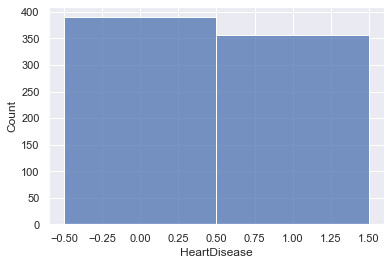

In [11]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset["HeartDisease"], discrete=True)
plt.show()

Appears the numbers of subjects with heart disease vs. number of subjects without heart disease seems balanced.

## Data distributions ##

After looking at target variable HeartDisease, next going to look at the distribution of other variables in the dataset.

### Sex distribution ###

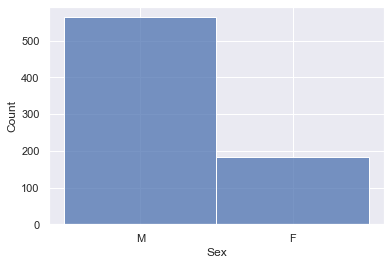

In [12]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset, x="Sex")
plt.show()

See more than double the number of males in the dataset than females. 

### Age distribution ###

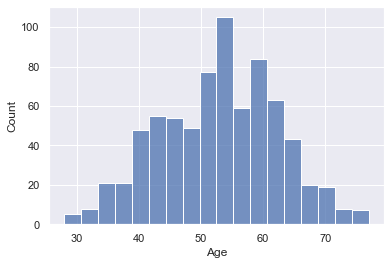

In [13]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset, x="Age")
plt.show()

See a wide distribution of ages included in dataset. 

## Correlations ##

Next, want to explore how data is related and whether any of the numerical variables in the dataset correlate

To do this, using the corr() method to get a correlation matrix of all the correlation coefficients between each variable in the dataset

In [14]:
HeartDataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


See positive correlations between HeartDisease and Oldpeak, Age, FastingBS, RestingBP and Cholesterol and negative correlations between HeartDisease and MaxHR. 

Although correlation matrix gives us correlation coefficients, in order to better visualise these correlations going to plot them using Seaborn.

First define corr, then plot the correlations with Seaborn using the heatmap function and setting a colour map, with blue indicating a positive correlation and red a negative correlation. 

<AxesSubplot:>

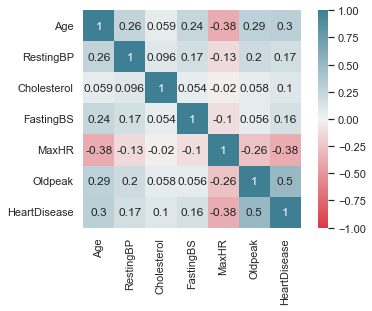

In [15]:
corr = HeartDataset.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

From this plot, can see that there is indeed a strong negative correlation between HeartDisease and MaxHR. Also see strong positive correlations between HeartDisease and Oldpeak and HeartDisease and Age.

#### Most negative correlation

In [16]:
print(f'Most negative correlation is between:  {corr.min().idxmin(), corr[corr.min().idxmin()].idxmin()} variables with correlation coefficient = {corr.min().min()}')

Most negative correlation is between:  ('Age', 'MaxHR') variables with correlation coefficient = -0.38211211617734564


#### Most positive correlation

First need to remove 1.0 values in correlation matrix

In [17]:
new_corr = corr.replace(1.0, np.nan)
new_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,NaN,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,NaN,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,NaN,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,NaN,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,NaN,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,NaN,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,NaN


In [18]:
print(f'Most positive correlation is between:  {new_corr.max().idxmax(), new_corr[new_corr.max().idxmax()].idxmax()} variables with correlation coefficient = {new_corr.max().max()}')

Most positive correlation is between:  ('Oldpeak', 'HeartDisease') variables with correlation coefficient = 0.4956962549378713


To have a better insight into the relationships between each of these variables, going to plot each in a scatter matrix using the seaborn function pairplot

[]

<Figure size 1080x720 with 0 Axes>

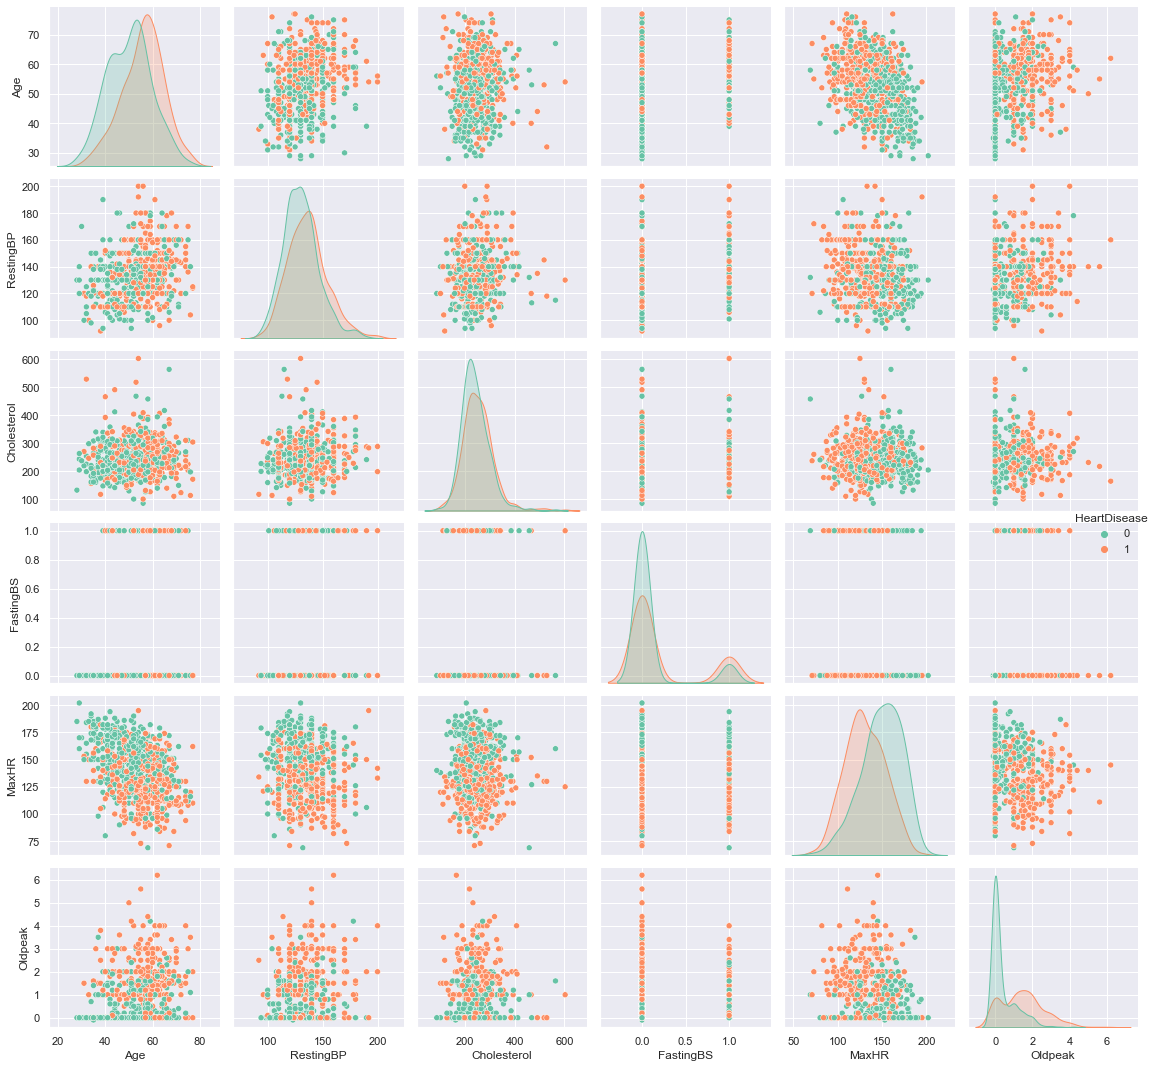

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(HeartDataset,hue="HeartDisease", palette="Set2")
plt.tight_layout()
plt.plot()

## Exploring Relationships in the Data ##

#### Heart Disease and Age #### 

<AxesSubplot:xlabel='Age', ylabel='Count'>

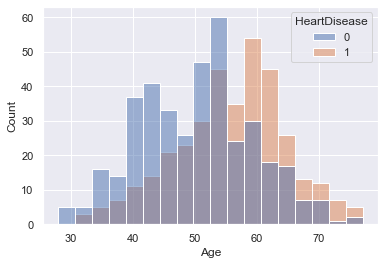

In [57]:
sns.histplot(data=HeartDataset, x="Age", hue="HeartDisease")

In [64]:
print (f'Subjects without heart disease have average age of {round(HeartDataset[HeartDataset["HeartDisease"]==0]["Age"].mean(),2)}')

print (f'Subjects with heart disease have average age of {round(HeartDataset[HeartDataset["HeartDisease"]==1]["Age"].mean(),2)}')

Subjects without heart disease have average age of 50.17
Subjects with heart disease have average age of 55.85


See subjects with heart disease are older on average

#### Heart Disease and Sex ####

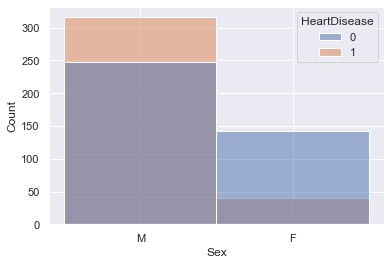

In [21]:
sns.set(style="darkgrid")
sns.histplot(HeartDataset, x="Sex", hue="HeartDisease")
plt.show()

In [22]:
print (f'{round(HeartDataset[HeartDataset["Sex"]=="F"]["HeartDisease"].mean()*100,2)} % of females in dataset have heart disease')

print (f'{round(HeartDataset[HeartDataset["Sex"]=="M"]["HeartDisease"].mean()*100,2)} % of males in dataset have heart disease')

21.98 % of females in dataset have heart disease
56.03 % of males in dataset have heart disease


Suggests males much more likely to suffer from heart disease than females, however due to the differences in sample size between these two populations, cannot be treated as a true result. 

#### Heart Disease and Oldpeak ####

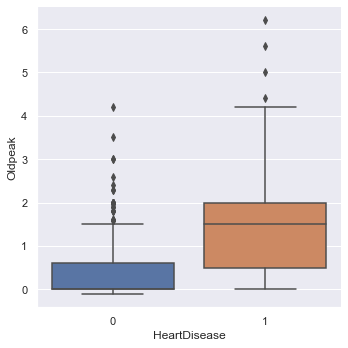

In [23]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="Oldpeak", kind="box")

In [62]:
print (f'Subjects without heart disease have average old peak of {round(HeartDataset[HeartDataset["HeartDisease"]==0]["Oldpeak"].mean(),2)}')

print (f'Subjects with heart disease have average old peak of {round(HeartDataset[HeartDataset["HeartDisease"]==1]["Oldpeak"].mean(),2)}')

Subjects without heart disease have average old peak of 0.39
Subjects with heart disease have average old peak of 1.46


#### HeartDisease and FastingBS #### 

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

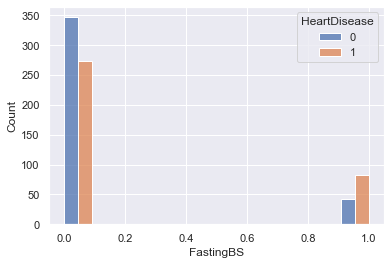

In [24]:
sns.histplot(data=HeartDataset, x="FastingBS", hue="HeartDisease", multiple = "dodge")

FastingBS (1 = if >120mg/dl, 0 = otherwise)

See higher numbers of patients with heart disease having a fasting blood sugar of >120mg/dl

#### HeartDisease and cholesterol ####

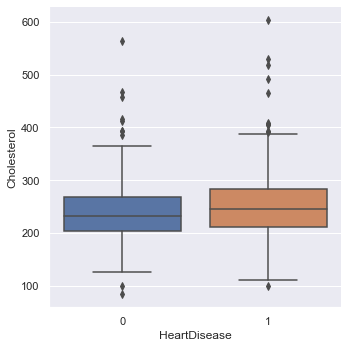

In [25]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="Cholesterol", kind="box")

In [65]:
print (f'Subjects without heart disease have average serum cholesterol of {round(HeartDataset[HeartDataset["HeartDisease"]==0]["Cholesterol"].mean(),2)}')

print (f'Subjects with heart disease have average serum cholesterol of {round(HeartDataset[HeartDataset["HeartDisease"]==1]["Cholesterol"].mean(),2)}')

Subjects without heart disease have average serum cholesterol of 238.77
Subjects with heart disease have average serum cholesterol of 251.06


#### HeartDisease and MaxHR ####

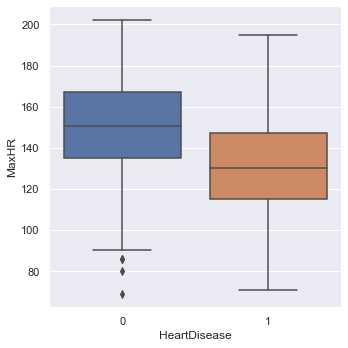

In [26]:
sns.catplot(data=HeartDataset, x="HeartDisease", y="MaxHR", kind="box")

In [63]:
print (f'Subjects without heart disease have average maximum heartrate of {round(HeartDataset[HeartDataset["HeartDisease"]==0]["MaxHR"].mean(),2)}')

print (f'Subjects with heart disease have average maximum heartrate of {round(HeartDataset[HeartDataset["HeartDisease"]==1]["MaxHR"].mean(),2)}')

Subjects without heart disease have average maximum heartrate of 149.06
Subjects with heart disease have average maximum heartrate of 130.55


See that patients with heart disease tend to have lower maximum heart rates than those without heart disease.

#### Heart disease and Chest pain type ####

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

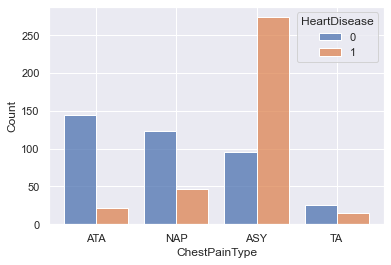

In [27]:
sns.histplot(data=HeartDataset, x="ChestPainType", hue="HeartDisease", multiple="dodge", shrink=.8)

#### Heart disease and Exercise Angina ####

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

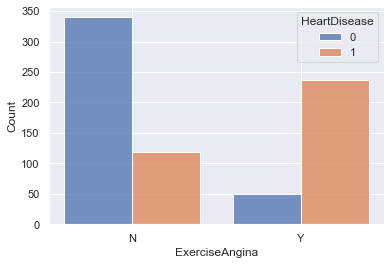

In [28]:
sns.histplot(data=HeartDataset, x="ExerciseAngina", hue="HeartDisease", multiple="dodge", shrink=.8)

#### Heart disease and Resting ECG ####

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

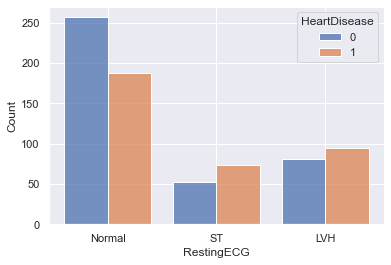

In [29]:
 sns.histplot(data=HeartDataset, x="RestingECG", hue="HeartDisease", multiple="dodge", shrink=.8)

#### Heart disease and ST slope #### 

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

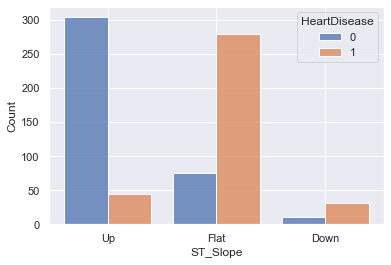

In [30]:
sns.histplot(data=HeartDataset, x="ST_Slope", hue="HeartDisease", multiple="dodge", shrink=.8)

## Model selection ##

Finally, after exploring the dataset, going to try and fit various models to try and see which best predicts HeartDisease. 

### Splitting data into train and test data sets ###

Define the explanatory variables ("X") and the target variable (y) and split into training and test data using train_test_split. 

In [31]:
X= HeartDataset.drop('HeartDisease', axis=1)
y= HeartDataset['HeartDisease']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)

As our data contains categorical variables, before making prediction model need to convert these categorical variables into ordinal variables

First, defining data as either categorical or numerical, depending on data type (excluding target cariable HeartDisease):

In [32]:
numerical= HeartDataset.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = HeartDataset.select_dtypes('object').columns

print(f'Numerical Columns:  {HeartDataset[numerical].columns}')
print('\n')
print(f'Categorical Columns: {HeartDataset[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


Then, using OneHotEncoder function from SciKit Learn, one-hot encode the categorical features and let the rest of the numerical data to passthrough.

Then apply a scaler function to the numerical data, using the StandardScaler() function imported from SciKit Learn.

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler

ohe= OneHotEncoder(sparse=False, handle_unknown="ignore")
standardizer = StandardScaler()
ct= make_column_transformer((ohe, categorical), remainder="passthrough")
ct1= make_column_transformer((ohe,categorical),(standardizer,numerical))  

Now categorical variables converted into ordinal variables and a scaler applied to numerical variables, can begin making and testing model performance

### Logistic Regression ### 

Import LogisticRegression model function from SciKit Learn, and create model using a pipeline to include one hot encoded categorical data and scaled numerical data

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
LRmodel = make_pipeline(ct1, LogisticRegression(solver="liblinear", fit_intercept=True))
LRmodel.fit(train_X, train_y)
prediction=LRmodel.predict(test_X)

Inital model score

In [35]:
LRmodelscore = LRmodel.score(test_X, test_y)
LRmodelscore

0.8449197860962567

To get a breakdown of the number of true positives and negatives vs. the false positives and negatives produced by the model, import the confusion_matrix from SciKit Learn.

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction)

TN, FP, FN, TP = confusion_matrix(test_y, prediction).ravel()

print('True positive(TP) = ', TP)
print('False positive(FP) = ', FP)
print('True negative(TN) = ', TN)
print('False negitive(FN) = ', FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print('Accuracy score = {:0.3f}'.format(accuracy))

True positive(TP) =  83
False positive(FP) =  16
True negative(TN) =  75
False negitive(FN) =  13
Accuracy score = 0.845


### Gaussian Naive Bayes ###

Import GaussianNB from SciKit Learn and fit using training data

In [37]:
from sklearn.naive_bayes import GaussianNB                          
NBmodel = make_pipeline(ct1, GaussianNB())
NBmodel.fit(train_X, train_y)
NBprediction=NBmodel.predict(test_X)

Initial model score

In [38]:
NBmodelscore = NBmodel.score(test_X, test_y)
NBmodelscore

0.8288770053475936

In [39]:
cm = confusion_matrix(test_y, NBprediction)

TN, FP, FN, TP = confusion_matrix(test_y, NBprediction).ravel()

print("True positive(TP) = ", TP)
print("False positive(FP) = ", FP)
print("True negative(TN) = ", TN)
print("False negative(FN) = ", FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print("Accuracy of the model = {:0.3f}".format(accuracy))

True positive(TP) =  82
False positive(FP) =  18
True negative(TN) =  73
False negative(FN) =  14
Accuracy of the model = 0.829


### K-Nearest Neighbors ###

Import model from SciKit Learn, and set hyperparameter n_neighbors

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

KNmodel = make_pipeline(ct1, KNeighborsClassifier(n_neighbors=7))
KNmodel.fit(train_X, train_y)
KNprediction=KNmodel.predict(test_X)

Initial model score (improves with scalar)

In [41]:
KNmodelscore = KNmodel.score(test_X,test_y)
KNmodelscore

0.839572192513369

In [42]:
cm = confusion_matrix(test_y, KNprediction)

TN, FP, FN, TP = confusion_matrix(test_y, KNprediction).ravel()

print("True positive(TP) = ", TP)
print("False positive(FP) = ", FP)
print("True negative(TN) = ", TN)
print("False negative(FN) = ", FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print("Accuracy of the model = {:0.3f}".format(accuracy))

True positive(TP) =  83
False positive(FP) =  17
True negative(TN) =  74
False negative(FN) =  13
Accuracy of the model = 0.840


In [43]:
#X_fit = pd.DataFrame() 
#KNmodel.predict(X_fit)

### SVC ###

Import model from SciKit Learn, and set hyperparameters tol=1e-5

#print(clf.named_steps['linearsvc'].coef_)
#print(clf.named_steps['linearsvc'].intercept_)
#print(clf.predict([[X_fit]]))

In [44]:
from sklearn.svm import SVC
SVCmodel = make_pipeline(ct1, SVC(gamma="scale"))
SVCmodel.fit(train_X, train_y)
SVCprediction=SVCmodel.predict(test_X)

In [45]:
SVCmodelscore = SVCmodel.score(test_X, test_y)
SVCmodelscore

0.8449197860962567

In [46]:
cm = confusion_matrix(test_y, SVCprediction)

TN, FP, FN, TP = confusion_matrix(test_y, SVCprediction).ravel()

print("True positive(TP) = ", TP)
print("False positive(FP) = ", FP)
print("True negative(TN) = ", TN)
print("False negative(FN) = ", FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print("Accuracy of the model = {:0.3f}".format(accuracy))

True positive(TP) =  84
False positive(FP) =  17
True negative(TN) =  74
False negative(FN) =  12
Accuracy of the model = 0.845


### Decision Trees ###

Import model from SciKit Learn

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
DTmodel = make_pipeline(ct, tree.DecisionTreeClassifier())
DTmodel.fit(train_X, train_y)
DTprediction=DTmodel.predict(test_X)

In [48]:
DTmodelscore = DTmodel.score(test_X, test_y)
DTmodelscore

0.7807486631016043

In [49]:
cm = confusion_matrix(test_y, DTprediction)

TN, FP, FN, TP = confusion_matrix(test_y, DTprediction).ravel()

print("True positive(TP) = ", TP)
print("False positive(FP) = ", FP)
print("True negative(TN) = ", TN)
print("False negative(FN) = ", FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print("Accuracy of the model = {:0.3f}".format(accuracy))

True positive(TP) =  76
False positive(FP) =  21
True negative(TN) =  70
False negative(FN) =  20
Accuracy of the model = 0.781


## Comparing model performance ##

After generating various prediction models, we need to compare each one to see which performs best. 

### Comparing accuracy, precision and recall scores ###

In [50]:
models = {}

models["Logistic Regression"] = LRmodel
models["Naive Bayes"] = NBmodel
models["K-Nearest Neighbors"] = KNmodel
models["Support Vector Machines"] = SVCmodel
models["Decision Trees"] = DTmodel

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    models[key].fit(train_X, train_y)
    
    predictions = models[key].predict(test_X)
    
    accuracy[key] = accuracy_score(predictions, test_y)
    precision[key] = precision_score(predictions, test_y)
    recall[key] = recall_score(predictions, test_y)

In [51]:
df_modelcompare = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_modelcompare["Accuracy"] = accuracy.values()
df_modelcompare["Precision"] = precision.values()
df_modelcompare["Recall"] = recall.values()

df_modelcompare

,Accuracy,Precision,Recall
Logistic Regression,0.844920,0.864583,0.838384
Naive Bayes,0.828877,0.854167,0.820000
K-Nearest Neighbors,0.839572,0.864583,0.830000
Support Vector Machines,0.844920,0.875000,0.831683
Decision Trees,0.796791,0.781250,0.815217


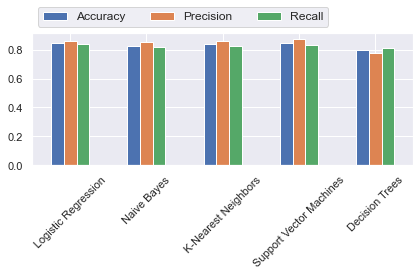

In [52]:
ax = df_modelcompare.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc="lower left", prop={"size":12})
plt.tight_layout()

### Plotting ROC curves ###

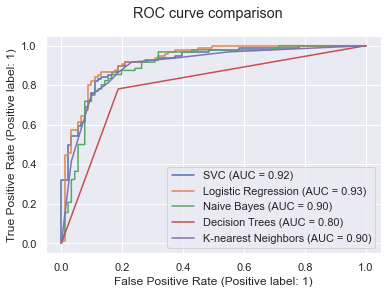

In [53]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(SVCmodel, test_X, test_y, name="SVC")
LR_disp = plot_roc_curve(LRmodel, test_X, test_y, ax=svc_disp.ax_, name="Logistic Regression")
NB_disp = plot_roc_curve(NBmodel, test_X, test_y, ax=svc_disp.ax_, name="Naive Bayes")
DT_disp = plot_roc_curve(DTmodel, test_X, test_y, ax=svc_disp.ax_, name="Decision Trees")
KN_disp = plot_roc_curve(KNmodel, test_X, test_y, ax=svc_disp.ax_, name="K-nearest Neighbors")
svc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Overall, appears that the best performing models in terms of predicting HeartDisease are SVC, Logistic Regression and Naive Bayes models. 